# Hierarchical Clustering – Complete Theory (Markdown)

**Hierarchical Clustering** is an **unsupervised machine learning algorithm** used to group similar data points into clusters by creating a hierarchy or tree-like structure of nested clusters. It does not require specifying the number of clusters in advance.

---

##  Types of Hierarchical Clustering

1. **Agglomerative Clustering (Bottom-Up)**  
   - Starts with each data point as its **own cluster**.  
   - Iteratively merges the **two closest clusters** until only one cluster remains (or until a stopping criterion is met).
   - The result is a **dendrogram** – a tree that shows how clusters are merged at each step.

   **Steps:**
   1. Treat each point as a single cluster.
   2. Compute the **distance matrix** for all pairs of clusters.
   3. Merge the two closest clusters.
   4. Update the distance matrix.
   5. Repeat until only one cluster remains.

2. **Divisive Clustering (Top-Down)**  
   - Starts with all points in **one big cluster**.  
   - Recursively splits the cluster into smaller clusters based on dissimilarity, until each point is its own cluster.

   **Steps:**
   1. Start with all data in one cluster.
   2. Compute the distances between all points.
   3. Split the cluster into two groups.
   4. Recursively repeat the splitting on each sub-cluster.

---

##  Dendrogram

- A **dendrogram** is a tree diagram that shows the sequence of cluster merges (agglomerative) or splits (divisive).
- You can cut the dendrogram at a desired height to obtain the **optimal number of clusters**.
- The **"elbow"** in the vertical distance helps in deciding the right number of clusters.

---

##  Advantages of Hierarchical Clustering

-  No need to predefine the number of clusters.
-  Produces a **hierarchy** of clusters for better interpretability.
-  Works well with clusters of **different shapes and sizes**.

---

##  Disadvantages

-  **Computationally expensive** (especially agglomerative, with time complexity of O(n³)).
-  **Sensitive to outliers** and noisy data.
-  Not suitable for **very large datasets**.

---

##  Comparison: Agglomerative vs. Divisive

| Feature                | Agglomerative                    | Divisive                        |
|------------------------|----------------------------------|----------------------------------|
| Start Condition        | Each point is a separate cluster | All points in one cluster       |
| Approach               | Merge closest clusters           | Split farthest points           |
| Usage                  | Most common                     | Less commonly used              |
| Output                 | Dendrogram                       | Dendrogram                      |

---

##  Limitations of K-Means (Compared to Hierarchical)

- K-Means requires the number of clusters (k) to be specified in advance.
- Sensitive to outliers which can distort cluster centroids.
- Assumes clusters are **spherical and equal in size**.
- Fails on **non-convex** or **irregular shapes**.
- Cannot handle **hierarchical relationships** between clusters.



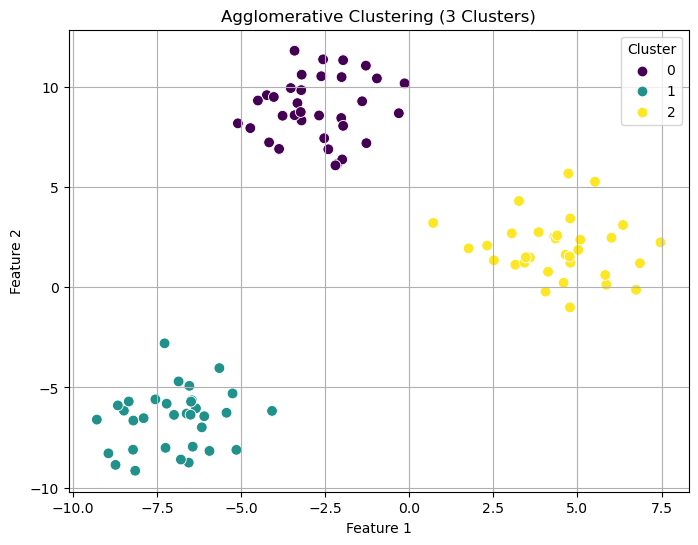

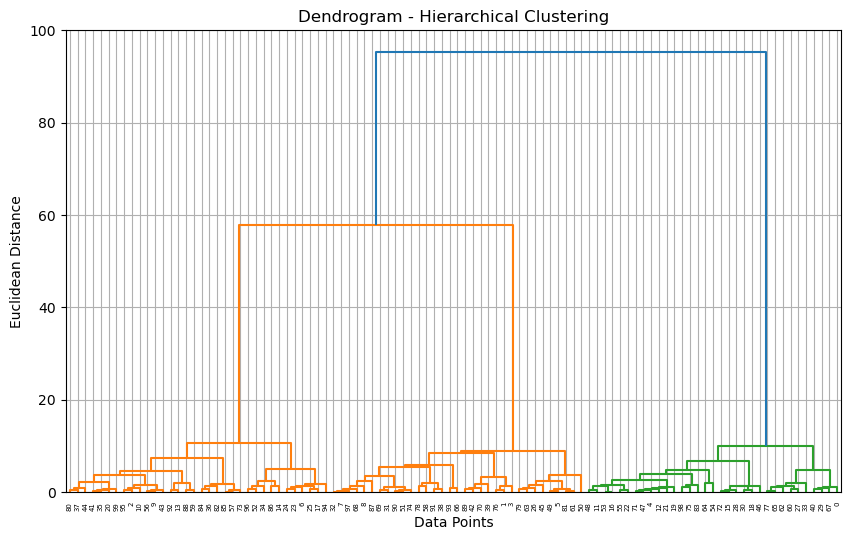

In [1]:
# Re-importing after kernel reset
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate synthetic 2D data
X, y = make_blobs(n_samples=100, centers=3, random_state=42, cluster_std=1.5)

# Agglomerative clustering
agg = AgglomerativeClustering(n_clusters=3)
agg_labels = agg.fit_predict(X)

# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=agg_labels, palette="viridis", s=60)
plt.title("Agglomerative Clustering (3 Clusters)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

# Dendrogram
linked = linkage(X, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title("Dendrogram - Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.grid(True)
plt.show()


# Hierarchical Clustering – Complete Theory with Linkage Methods

**Hierarchical Clustering** is an **unsupervised machine learning algorithm** used to group similar data points into clusters by creating a hierarchy or tree-like structure of nested clusters. It does not require specifying the number of clusters in advance.

---

##  Types of Hierarchical Clustering

### 1. Agglomerative Clustering (Bottom-Up)
- Starts with each data point as its **own cluster**.  
- Iteratively merges the **two closest clusters** until only one cluster remains (or until a stopping criterion is met).  
- The result is a **dendrogram** – a tree that shows how clusters are merged at each step.

**Steps:**
1. Treat each point as a single cluster.  
2. Compute the **distance matrix** for all pairs of clusters.  
3. Merge the two closest clusters.  
4. Update the distance matrix.  
5. Repeat until only one cluster remains.

### 2. Divisive Clustering (Top-Down)
- Starts with all points in **one big cluster**.  
- Recursively splits the cluster into smaller clusters based on dissimilarity, until each point is its own cluster.

**Steps:**
1. Start with all data in one cluster.  
2. Compute the distances between all points.  
3. Split the cluster into two groups.  
4. Recursively repeat the splitting on each sub-cluster.

---

##  Linkage Methods (Used to Measure Distance Between Clusters)

When merging clusters in **agglomerative clustering**, we must decide how to measure the distance between clusters. This is done using **linkage criteria**:

### 1. Single Linkage (Minimum Linkage)
- Distance between the **closest pair** of points in two clusters.  
- Tends to form **long, chain-like clusters**.

$$
D(A, B) = \min \{ d(x, y) \;|\; x \in A, \; y \in B \}
$$

### 2. Complete Linkage (Maximum Linkage)
- Distance between the **farthest pair** of points in two clusters.  
- Tends to produce **compact clusters** with similar diameters.

$$
D(A, B) = \max \{ d(x, y) \;|\; x \in A, \; y \in B \}
$$

### 3. Average Linkage (UPGMA)
- Distance is the **average of all pairwise distances** between points in the two clusters.  
- Balances between single and complete linkage.

$$
D(A, B) = \frac{1}{|A||B|} \sum_{x \in A} \sum_{y \in B} d(x, y)
$$

### 4. Centroid Linkage
- Distance between the **centroids (means)** of two clusters.

$$
D(A, B) = d(\mu_A, \mu_B)
$$

Where \( \mu_A \) and \( \mu_B \) are the centroids of clusters \( A \) and \( B \) respectively.

---

##  Dendrogram

- A **dendrogram** is a tree diagram that shows the sequence of cluster merges (agglomerative) or splits (divisive).  
- You can **cut** the dendrogram at a desired height to obtain the **optimal number of clusters**.  
- The **"elbow"** in the vertical distance helps in deciding the right number of clusters.

---

##  Advantages of Hierarchical Clustering

-  No need to predefine the number of clusters.  
-  Produces a **hierarchy** of clusters for better interpretability.  
-  Works well with clusters of **different shapes and sizes**.

---

##  Disadvantages

-  **Computationally expensive** (especially agglomerative, with time complexity of \( O(n^3) \)).  
-  **Sensitive to outliers** and noisy data.  
-  Not suitable for **very large datasets**.

---

##  Comparison: Agglomerative vs. Divisive

| Feature                | Agglomerative                    | Divisive                        |
|------------------------|----------------------------------|----------------------------------|
| Start Condition        | Each point is a separate cluster | All points in one cluster       |
| Approach               | Merge closest clusters           | Split farthest points           |
| Usage                  | Most common                      | Less commonly used              |
| Output                 | Dendrogram                       | Dendrogram                      |

---

##  Limitations of K-Means (Compared to Hierarchical)

- Requires the number of clusters \( k \) to be specified in advance.  
- Sensitive to **outliers**, which can distort cluster centroids.  
- Assumes clusters are **spherical and equal in size**.  
- Fails on **non-convex** or **irregular shapes**.  
- Cannot handle **hierarchical relationships** between clusters.


##  Cutting the Dendrogram to Form Flat Clusters

Once we construct a **dendrogram** using hierarchical clustering (usually Agglomerative), the next step is to decide **where to cut the tree** to determine the final clusters.

###  What is Cutting the Dendrogram?
- A **dendrogram** is a tree-like diagram that shows how individual points (or clusters) are merged step-by-step.
- **Cutting the dendrogram** means choosing a **horizontal line** (i.e., a **threshold distance or height**) at which to "cut" the tree.
- All clusters that are merged **below this line** are considered part of the same cluster.
- All branches that **split above this line** are treated as separate clusters.

###  How to Decide the Cutting Height?
1. **Visual Inspection:**
   - Look for the **longest vertical distance (gap)** between horizontal links (merges).
   - Cutting just **below this long vertical line** often yields the most natural separation of clusters.

2. **Predefined Number of Clusters (k):**
   - If you know how many clusters you want, you can cut the dendrogram so that you get exactly **k branches (clusters)**.
   - This is done using methods like `fcluster` in SciPy.

---

###  Example in Python (Using `scipy.cluster.hierarchy`)

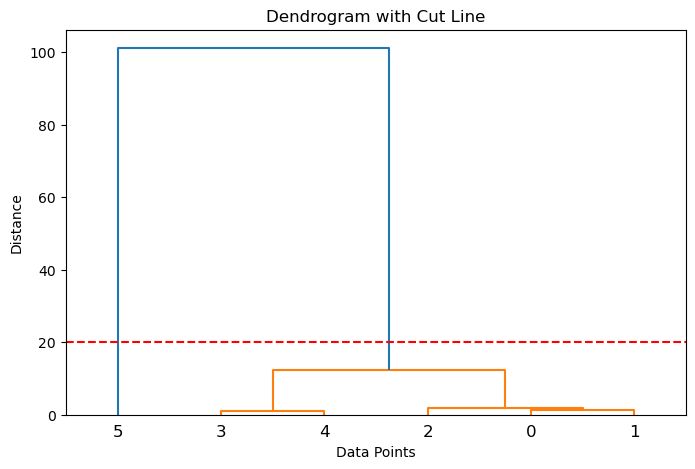

Cluster labels: [1 1 1 1 1 2]


In [2]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import numpy as np

# Sample data
X = np.array([[1, 2], [2, 3], [3, 2], [8, 7], [8, 8], [25, 80]])

# Perform linkage
Z = linkage(X, method='ward')

# Plot dendrogram
plt.figure(figsize=(8, 5))
dendrogram(Z)
plt.axhline(y=20, color='r', linestyle='--')  # cutting height
plt.title('Dendrogram with Cut Line')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Form flat clusters
clusters = fcluster(Z, t=20, criterion='distance')  # or use t=3 with criterion='maxclust'
print("Cluster labels:", clusters)

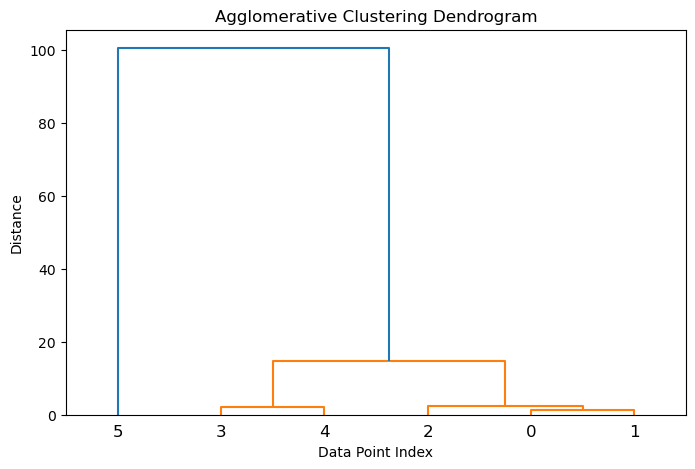

Cluster labels: [2 2 2 1 1 3]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Sample data
X = np.array([[1, 2], [2, 3], [3, 1], [8, 8], [9, 10], [25, 80]])

# Perform agglomerative clustering using 'ward' linkage
Z = linkage(X, method='ward')

# Plot dendrogram
plt.figure(figsize=(8, 5))
dendrogram(Z)
plt.title("Agglomerative Clustering Dendrogram")
plt.xlabel("Data Point Index")
plt.ylabel("Distance")
plt.show()

# Cut the dendrogram to form 3 clusters
labels = fcluster(Z, t=3, criterion='maxclust')
print("Cluster labels:", labels)

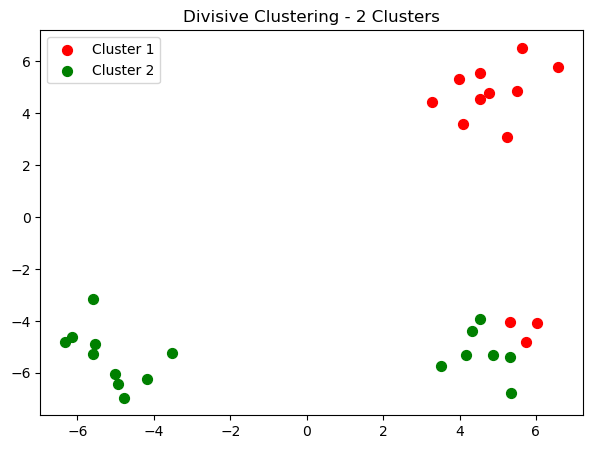

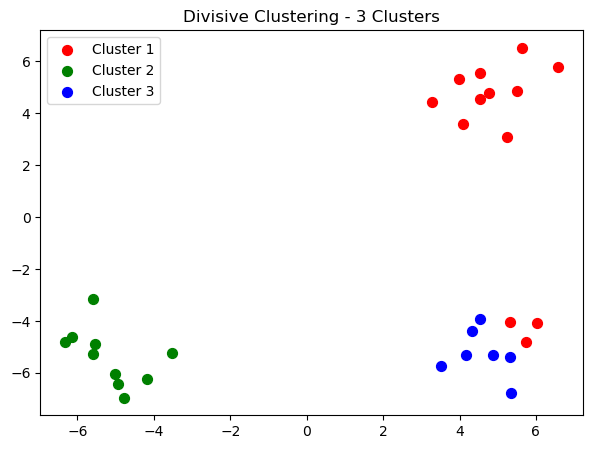

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

# Generate sample 2D data
np.random.seed(42)
X = np.vstack([
    np.random.randn(10, 2) + np.array([5, 5]),
    np.random.randn(10, 2) + np.array([-5, -5]),
    np.random.randn(10, 2) + np.array([5, -5])
])

def plot_clusters(X, clusters, title):
    plt.figure(figsize=(7,5))
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
    for i, cluster in enumerate(clusters):
        cluster_points = X[cluster]
        plt.scatter(cluster_points[:,0], cluster_points[:,1], 
                    s=50, c=colors[i % len(colors)], label=f'Cluster {i+1}')
    plt.title(title)
    plt.legend()
    plt.show()

def divisive_clustering(X, max_clusters=3):
    # Start with all points in one cluster
    clusters = [np.arange(len(X))]
    
    while len(clusters) < max_clusters:
        # Find cluster with largest variance to split
        variances = [np.var(X[c], axis=0).sum() for c in clusters]
        cluster_to_split_idx = np.argmax(variances)
        cluster_to_split = clusters.pop(cluster_to_split_idx)
        
        # Compute distance matrix within the cluster
        dist_matrix = squareform(pdist(X[cluster_to_split]))
        
        # Use the two points furthest apart as seeds for splitting
        i, j = np.unravel_index(np.argmax(dist_matrix), dist_matrix.shape)
        
        cluster1 = []
        cluster2 = []
        
        # Assign points to nearest seed point
        for idx in cluster_to_split:
            dist_to_i = np.linalg.norm(X[idx] - X[cluster_to_split[i]])
            dist_to_j = np.linalg.norm(X[idx] - X[cluster_to_split[j]])
            if dist_to_i < dist_to_j:
                cluster1.append(idx)
            else:
                cluster2.append(idx)
        
        clusters.append(np.array(cluster1))
        clusters.append(np.array(cluster2))
        
        # Plot clusters after this split
        plot_clusters(X, clusters, f'Divisive Clustering - {len(clusters)} Clusters')
    
    return clusters

# Run divisive clustering and visualize splits
clusters = divisive_clustering(X, max_clusters=3)


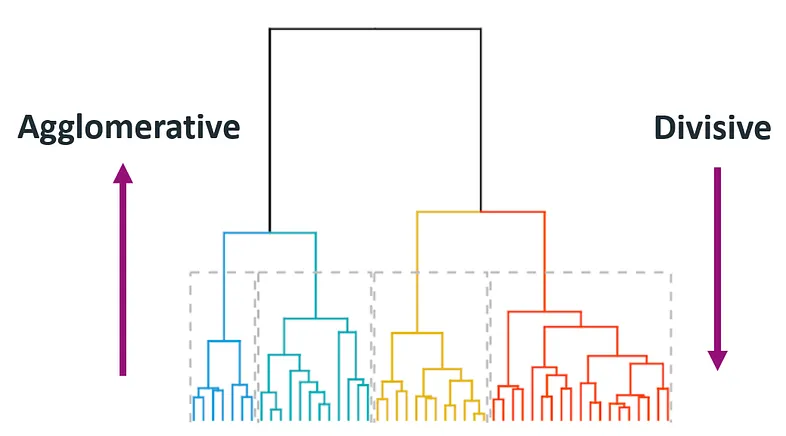